In [1]:
import torch
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob, test_size=0.2,random_state=RANDOM_SEED)

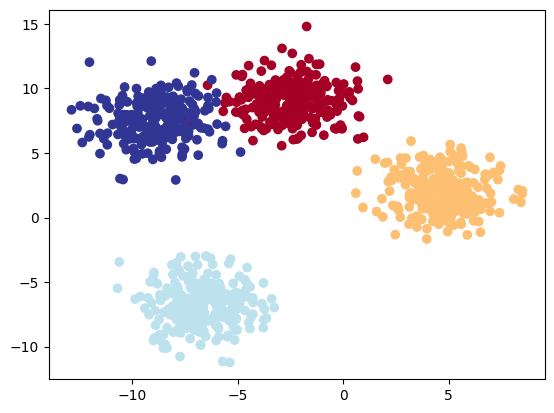

In [2]:
plt.plot(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [3]:
class BlobModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_units=8):
        """
            Initialize multi class classfication

            Args:
                input_features (int): no of input features to the model
                out_features (int): no of out features to the model
                hidden_units (int) : no of hidden units between layers, default 8
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )
    def forward(self, X):
        return self.linear_layer_stack(X)

In [4]:
model_0 = BlobModel(input_features=2, out_features=4, hidden_units=8)

In [5]:
model_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [6]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [7]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [9]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_blob_test)
y_logits[:10]


tensor([[-0.1827, -0.0033,  0.3772, -0.3662],
        [-0.3867,  0.0392, -0.0533, -0.4195],
        [-0.4615,  0.1296,  0.1626,  0.2100],
        [-0.1260,  0.0554,  0.4709, -0.2618],
        [-0.3860,  0.0240,  0.6213, -0.3986],
        [-0.4076,  0.0560, -0.1215, -0.4886],
        [-0.4675,  0.1174,  0.3482,  0.1766],
        [-0.4020,  0.0247,  0.4538, -0.3533],
        [-0.4207,  0.1892, -0.0127,  0.2045],
        [-0.3928,  0.0230,  0.5073, -0.3649]])

In [10]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [11]:
y_preds_probs = torch.softmax(y_logits, dim=1)

In [12]:
y_preds_probs[:5]

tensor([[0.2092, 0.2503, 0.3663, 0.1742],
        [0.2043, 0.3128, 0.2852, 0.1977],
        [0.1508, 0.2724, 0.2815, 0.2952],
        [0.2046, 0.2453, 0.3716, 0.1786],
        [0.1605, 0.2418, 0.4393, 0.1584]])

In [13]:
torch.sum(y_preds_probs[0])

tensor(1.)

In [14]:
y_preds = torch.argmax(y_preds_probs, dim=1)

In [15]:
y_preds

tensor([2, 1, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 3, 2, 2, 1, 1, 2, 2, 2,
        1, 1, 3, 1, 1, 1, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1,
        2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1,
        3, 1, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
        3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 3, 2, 1, 3, 2, 1, 3, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2,
        2, 1, 3, 2, 1, 2, 3, 2])

In [16]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct / len(y_pred))*100
    return accuracy

In [17]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_blob_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)
# Print stats
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | loss: {loss: .4f}% | Acc: {acc: .2f}% | Test loss: {test_loss: 0.4f}% | Test Acc: {test_acc: 0.2f}%")

Epoch: 0 | loss:  1.5302% | Acc:  6.38% | Test loss:  1.2985% | Test Acc:  41.00%
Epoch: 10 | loss:  0.6814% | Acc:  79.00% | Test loss:  0.6100% | Test Acc:  82.50%
Epoch: 20 | loss:  0.3880% | Acc:  98.12% | Test loss:  0.3450% | Test Acc:  99.00%
Epoch: 30 | loss:  0.1819% | Acc:  99.25% | Test loss:  0.1643% | Test Acc:  99.50%
Epoch: 40 | loss:  0.1054% | Acc:  99.38% | Test loss:  0.0944% | Test Acc:  99.50%
Epoch: 50 | loss:  0.0734% | Acc:  99.38% | Test loss:  0.0639% | Test Acc:  99.50%
Epoch: 60 | loss:  0.0572% | Acc:  99.38% | Test loss:  0.0483% | Test Acc:  99.50%
Epoch: 70 | loss:  0.0485% | Acc:  99.38% | Test loss:  0.0397% | Test Acc:  99.50%
Epoch: 80 | loss:  0.0431% | Acc:  99.38% | Test loss:  0.0342% | Test Acc:  99.50%
Epoch: 90 | loss:  0.0393% | Acc:  99.38% | Test loss:  0.0304% | Test Acc:  99.50%


In [18]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_blob_test)
y_logits[:5]

tensor([[ 3.3607,  8.3710, -1.6055, -8.6302],
        [ 2.9454, -8.4332, -6.0486,  7.5203],
        [-1.4424,  0.6121,  8.4217, -1.6501],
        [ 1.5510,  5.6350, -0.5944, -5.3181],
        [ 6.1801,  1.8462, -6.4358, -4.0644]])

In [19]:
y_props = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_props

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [20]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [21]:
from helper_functions import plot_predictions, plot_decision_boundary

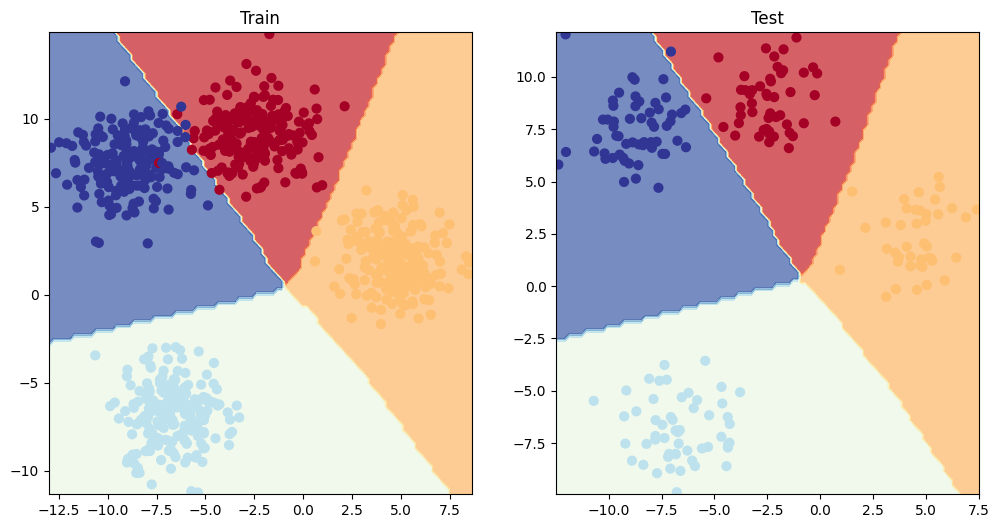

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

# Few more classification matrics

- Accuracy - Out of 100 samples how many our model gets correct
- Precision
- Recall
- F1 - Score
- Confusion matrix
- Classification report

In [24]:
from torchmetrics import Accuracy

accuracy_metric = Accuracy(task="multiclass", num_classes=4)  # or "multiclass" for >2 classes
acc = accuracy_metric(y_preds, y_blob_train)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9937


In [25]:
tp = ((y_preds == 1) & (y_blob_train == 1)).float().sum()
fp = ((y_preds == 1) & (y_blob_train == 0)).float().sum()
precision = tp / (tp + fp + 1e-8)  # Add small epsilon to avoid division by zero
print(f"Precision: {precision:.4f}")

Precision: 1.0000


In [27]:
from torchmetrics import Precision

precision_metric = Precision(task="multiclass", num_classes=4)
prec = precision_metric(y_preds, y_blob_train)
print(f"Precision: {prec:.4f}")

Precision: 0.9937


In [28]:
from torchmetrics import Recall

recall_metric = Recall(task="multiclass", num_classes=4)
rec = recall_metric(y_preds, y_blob_train)
print(f"Recall: {rec:.4f}")

Recall: 0.9937


In [29]:
from torchmetrics import F1Score

f1_metric = F1Score(task="multiclass", num_classes=4)
f1_score = f1_metric(y_preds, y_blob_train)
print(f"F1 Score: {f1_score:.4f}")

F1 Score: 0.9937


In [30]:
from torchmetrics import ConfusionMatrix

confmat_metric = ConfusionMatrix(task="multiclass", num_classes=4)
conf_matrix = confmat_metric(y_preds, y_blob_train)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
tensor([[198,   0,   0,   3],
        [  0, 209,   0,   0],
        [  0,   0, 197,   0],
        [  2,   0,   0, 191]])
